In [2]:
import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt

## Read the Data from the datos.gov.co

In [3]:
#There is 1 file per semester, since COPACABANA is a small town we want to have at least 2 years of data
#for now in this notebook we just read 2019-2, also the 2nd semester correspond to calendar A Schools
url="https://www.datos.gov.co/api/views/ynam-yc42/rows.csv?accessType=DOWNLOAD"
s=requests.get(url).content
#saber_df_2019_2 = pd.read_csv(io.StringIO(s.decode('utf-8')), engine='python')

In [4]:
saber_df_2019_2 = pd.read_csv(io.StringIO(s.decode('utf-8')))

/Users/diegomora/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
saber_df_2019_2

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3,3.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546207,CC,COLOMBIA,M,02/25/1999 12:00:00 AM,20194,SB11201940195862,ESTUDIANTE,No,COLOMBIA,-,...,58.0,79,A2,360,99,47.5807720132296,2,2.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
546208,TI,COLOMBIA,M,10/14/2002 12:00:00 AM,20194,SB11201940253002,ESTUDIANTE,No,COLOMBIA,-,...,74.0,97,B1,360,99,57.406418472062,3,4.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
546209,TI,COLOMBIA,M,11/22/2002 12:00:00 AM,20194,SB11201940364767,ESTUDIANTE,No,COLOMBIA,-,...,72.0,96,B1,377,100,71.2254308010465,4,3.0,PUBLICAR,GENERACION E - EXCELENCIA DEPARTAMENTAL
546210,TI,COLOMBIA,M,11/10/2002 12:00:00 AM,20194,SB11201940210026,ESTUDIANTE,No,COLOMBIA,-,...,46.0,45,A-,278,73,38.1334451267846,1,2.0,PUBLICAR,GENERACION E - GRATUIDAD


#### This file has more than 500K rows, we just need the copacabana data

In [6]:
saber_df_2019_2.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_C

In [7]:
saber_copa = saber_df_2019_2[(saber_df_2019_2['ESTU_MCPIO_RESIDE'] == 'COPACABANA')]
saber_otros = saber_df_2019_2[(saber_df_2019_2['ESTU_MCPIO_RESIDE'] != 'COPACABANA')]

In [8]:
saber_copa.shape

(866, 82)

In [46]:
print("----------")
print("ESTU_TIPODOCUMENTO")
print(saber_copa.ESTU_TIPODOCUMENTO.unique())
print()
print("num unique values: ", len(saber_copa.ESTU_TIPODOCUMENTO.unique()))
print()
print("----------")
print("ESTU_ETNIA")
print(saber_copa.ESTU_ETNIA.unique())
print()
print("num unique values: ", len(saber_copa.ESTU_ETNIA.unique()))
print()
print("FAMI_TRABAJOLABORMADRE")
print(saber_copa.FAMI_TRABAJOLABORMADRE.unique())
print()
print("num unique values: ", len(saber_copa.FAMI_TRABAJOLABORMADRE.unique()))
print()
print("FAMI_EDUCACIONMADRE")
print(saber_copa.FAMI_EDUCACIONMADRE.unique())
print()
print("num unique values: ", len(saber_copa.FAMI_TRABAJOLABORMADRE.unique()))


----------
ESTU_TIPODOCUMENTO
['CC' 'TI' 'CE' 'CR' 'NES' 'PEP']

num unique values:  6

----------
ESTU_ETNIA
['-' 'Ninguno']

num unique values:  2

FAMI_TRABAJOLABORMADRE
['Trabaja en el hogar, no trabaja o estudia'
 'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)'
 'Trabaja por cuenta propia (por ejemplo plomero, electricista)'
 'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc'
 'Es vendedor o trabaja en atención al público'
 'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)'
 'No aplica' 'Es agricultor, pesquero o jornalero' '-'
 'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción'
 'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial'
 'No sabe' 'Es operario de máquinas o conduce vehículos (taxita, chofer)'
 nan 'Pensionado']

num unique values:  15

FAMI_EDUCACIONMADRE
['Primaria completa' 'Técnica o tecnológica completa'
 

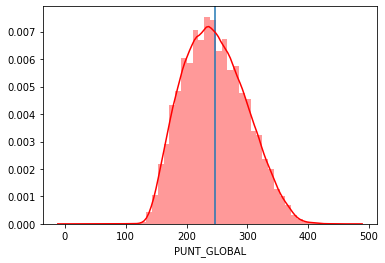

In [23]:
plt.axvline(saber_otros['PUNT_GLOBAL'].mean())
sns.distplot(saber_otros['PUNT_GLOBAL'], bins=50, color='r')

In [30]:
print(saber_otros['PUNT_GLOBAL'].mean())

246.17396111826253


In [31]:
print(saber_copa['PUNT_GLOBAL'].mean())

254.06004618937644


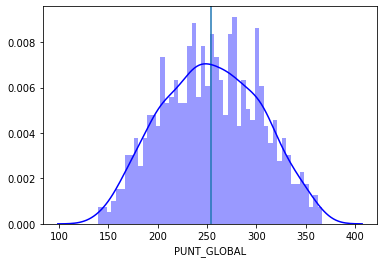

In [24]:
plt.axvline(saber_copa['PUNT_GLOBAL'].mean(), color='b')
sns.distplot(saber_copa['PUNT_GLOBAL'], bins=50, color='b')

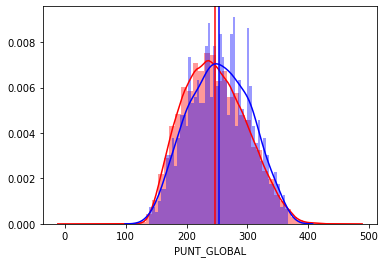

In [29]:
fig, ax = plt.subplots()
plt.axvline(saber_otros['PUNT_GLOBAL'].mean(), color='r')
sns.distplot(saber_otros['PUNT_GLOBAL'], bins=50, color='r')

plt.axvline(saber_copa['PUNT_GLOBAL'].mean(), color='b')
sns.distplot(saber_copa['PUNT_GLOBAL'], bins=50, color='b')

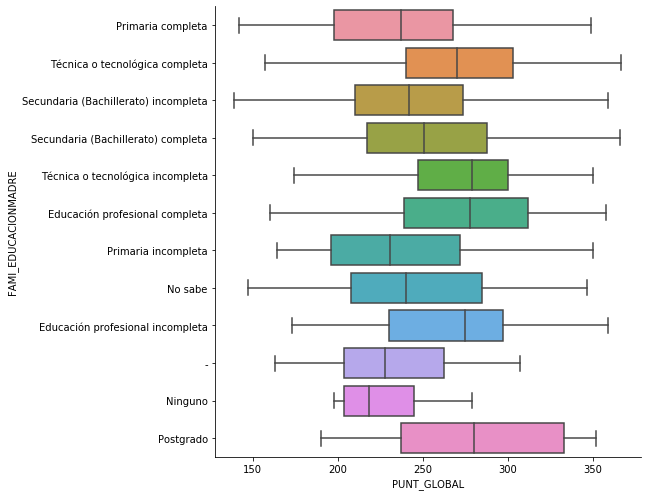

In [10]:
sns.catplot(x = 'PUNT_GLOBAL', y = 'FAMI_EDUCACIONMADRE', kind='box', data=saber_copa, height=7, aspect = 1.3)